In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
lots = pd.read_csv('tba_lots.csv')

In [139]:
lots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505127 entries, 0 to 1505126
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   lot_id                    1496774 non-null  object 
 1   auction_id                1504928 non-null  float64
 2   auction_start_time        1505127 non-null  object 
 3   auction_close_time        1505127 non-null  object 
 4   lot_close_time_actual     715452 non-null   object 
 5   estimated_price           1503911 non-null  float64
 6   starting_price            1505127 non-null  float64
 7   is_delivery               1505127 non-null  int64  
 8   auction_country           1504966 non-null  object 
 9   lot_quantity              1503911 non-null  float64
 10  lot_title                 1487192 non-null  object 
 11  lot_description           893775 non-null   object 
 12  appearance                1479751 non-null  object 
 13  condition                 1

In [140]:
lots = lots.dropna(subset=['lot_quantity', 'estimated_price', 'nr_bids','highest_valid_bid_amount','nr_valid_bid_users'])
lots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100104 entries, 0 to 1505124
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   lot_id                    1100104 non-null  object 
 1   auction_id                1100083 non-null  float64
 2   auction_start_time        1100104 non-null  object 
 3   auction_close_time        1100104 non-null  object 
 4   lot_close_time_actual     555944 non-null   object 
 5   estimated_price           1100104 non-null  float64
 6   starting_price            1100104 non-null  float64
 7   is_delivery               1100104 non-null  int64  
 8   auction_country           1100104 non-null  object 
 9   lot_quantity              1100104 non-null  float64
 10  lot_title                 1087427 non-null  object 
 11  lot_description           844423 non-null   object 
 12  appearance                1082045 non-null  object 
 13  condition                 108208

In [141]:
lots.describe()

,auction_id,estimated_price,starting_price,is_delivery,lot_quantity,category_id,is_offered,is_sold,has_bids,nr_bids,highest_valid_bid_amount,nr_valid_bid_users
count,1.100083e+06,1.100104e+06,1.100104e+06,1.100104e+06,1.100104e+06,1.098693e+06,1.100104e+06,1.100104e+06,1100104.0,1.100104e+06,1.100104e+06,1.100104e+06
mean,9.828607e+05,1.177119e+03,2.929235e+02,1.095224e-01,6.405275e+01,3.808760e+03,9.980647e-01,8.340457e-01,1.0,1.381931e+01,9.826710e+02,4.911453e+00
std,8.391768e+04,1.919679e+04,4.364894e+03,3.122936e-01,3.197952e+04,1.040919e+03,4.394915e-02,3.720398e-01,0.0,1.563352e+01,8.449564e+03,4.046898e+00
min,2.892030e+05,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.001330e+05,1.000000e+01,1.000000e+01,0.000000e+00,1.000000e+00,3.052000e+03,1.000000e+00,1.000000e+00,1.0,2.000000e+00,4.000000e+01,2.000000e+00
50%,9.791750e+05,6.000000e+01,1.500000e+01,0.000000e+00,1.000000e+00,3.525000e+03,1.000000e+00,1.000000e+00,1.0,8.000000e+00,1.050000e+02,4.000000e+00
75%,1.072333e+06,2.500000e+02,1.000000e+02,0.000000e+00,1.000000e+00,4.522000e+03,1.000000e+00,1.000000e+00,1.0,2.000000e+01,3.200000e+02,7.000000e+00
max,1.117122e+06,1.000000e+07,2.250000e+06,1.000000e+00,3.312331e+07,6.650000e+03,1.000000e+00,1.000000e+00,1.0,2.130000e+02,5.000000e+06,6.000000e+01


In [142]:
percentile_95 = lots['lot_quantity'].quantile(0.95)

# Filter the DataFrame to discard data above the 95th percentile of lot_quantity
lots = lots[lots['lot_quantity'] <= percentile_95]

## First strategy: Fill in with average estmated price

In [124]:
# estimated price'ı 0 olan lotlara asssign et = o categorideki ürünlerin estimated price'ı / o categorideki total lottaki ürün sayısı
# Step 1: Filter the DataFrame where estimated_price is less than 1
filtered_data = lots[lots['estimated_price'] > 5]

# Step 2: Group by 'category_id' and 'lot_quantity' and calculate the average estimated price
average_prices = filtered_data.groupby(['category_id', 'lot_quantity'])['estimated_price'].mean().reset_index()

# Rename the column for clarity when merging
average_prices.rename(columns={'estimated_price': 'average_estimated_price'}, inplace=True)

# Step 3: Merge this average back to the original DataFrame
lots = lots.merge(average_prices, on=['category_id', 'lot_quantity'], how='left')

# Step 4: Update estimated_price where it was less than 1
lots.loc[lots['estimated_price'] < 6, 'estimated_price'] = lots['average_estimated_price']

# Step 5: Clean up the DataFrame by dropping the temporary average column
lots.drop(columns=['average_estimated_price'], inplace=True)

## Second strategy: Fill in estimated price smaller than starting price with starting price

In [143]:
lots.loc[lots['estimated_price'] < lots['starting_price'], 'estimated_price'] = lots['starting_price']


In [144]:
filtered_data = lots[lots['estimated_price'] > 0]

# Step 2: Group by 'category_id' and 'lot_quantity' and calculate the average estimated price
average_prices = filtered_data.groupby(['category_id', 'lot_quantity'])['estimated_price'].mean().reset_index()

# Rename the column for clarity when merging
average_prices.rename(columns={'estimated_price': 'average_estimated_price'}, inplace=True)

# Step 3: Merge this average back to the original DataFrame
lots = lots.merge(average_prices, on=['category_id', 'lot_quantity'], how='left')

# Step 4: Update estimated_price where it was less than 1
lots.loc[lots['estimated_price'] < 1, 'estimated_price'] = lots['average_estimated_price']

# Step 5: Clean up the DataFrame by dropping the temporary average column
lots.drop(columns=['average_estimated_price'], inplace=True)

## Creating a measure for auction performance

In [155]:
lots['log_auction_performance'] = np.log((lots['highest_valid_bid_amount'] *lots['nr_bids'] *lots['nr_valid_bid_users'] )/(lots['estimated_price']+1e-10) )

(array([3.00000e+00, 1.91000e+02, 5.37570e+04, 2.79864e+05, 3.50863e+05,
        3.04804e+05, 5.02940e+04, 6.27200e+03, 4.59000e+02, 1.90000e+01]),
 array([-9.83894903, -6.91843994, -3.99793085, -1.07742177,  1.84308732,
         4.76359641,  7.6841055 , 10.60461459, 13.52512368, 16.44563276,
        19.36614185]),
 <BarContainer object of 10 artists>)

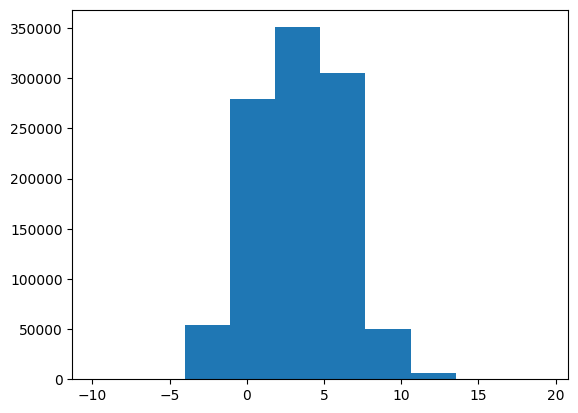

In [156]:
plt.hist(lots['log_auction_performance'])

In [152]:
lots['auction_performance'] = (lots['highest_valid_bid_amount'] *lots['nr_bids'] *lots['nr_valid_bid_users'] )/(lots['estimated_price']+1e-10)

(array([1.046512e+06, 6.000000e+00, 2.000000e+00, 2.000000e+00,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([5.33333333e-05, 2.57400000e+07, 5.14800000e+07, 7.72200000e+07,
        1.02960000e+08, 1.28700000e+08, 1.54440000e+08, 1.80180000e+08,
        2.05920000e+08, 2.31660000e+08, 2.57400000e+08]),
 <BarContainer object of 10 artists>)

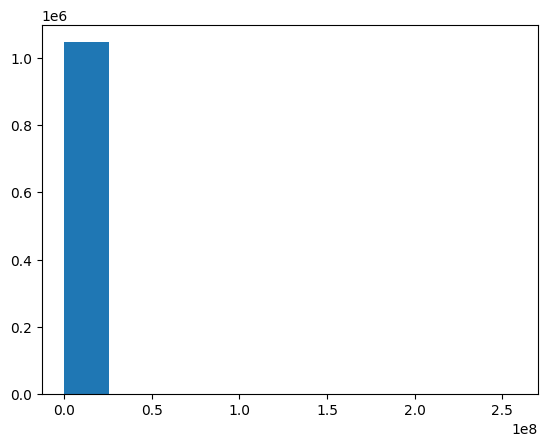

In [153]:
plt.hist(lots['auction_performance'])

#### Log performance seems more reasonable and informative therefore continue with log performance

In [157]:
lots.drop(columns=['auction_performance'], inplace=True)

## Visualizations

### Performance by Country

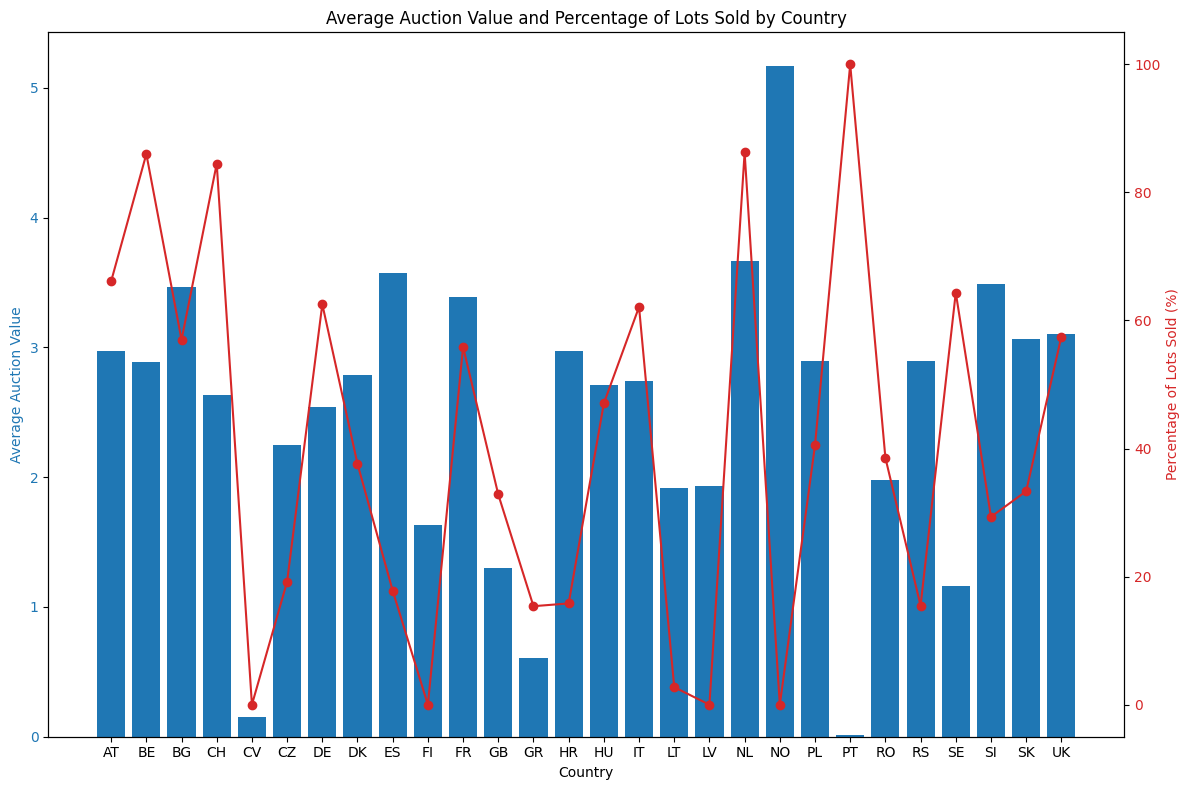

In [168]:
lots['auction_country'] = lots['auction_country'].str.upper()


country_stats = lots.groupby('auction_country').agg(
    Total_Lots=('is_sold', 'size'),
    Sold_Lots=('is_sold', 'sum'),
    Average_Auction_Value=('log_auction_performance', 'mean')
).assign(
    Sold_Percentage=lambda x: (x['Sold_Lots'] / x['Total_Lots']) * 100
)

# Reset index to make 'Country' a column again for easier plotting
country_stats.reset_index(inplace=True)

# Creating a plot with a twin axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for average auction value
color = 'tab:blue'
ax1.set_xlabel('Country')
ax1.set_ylabel('Average Auction Value', color=color)
ax1.bar(country_stats['auction_country'], country_stats['Average_Auction_Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Percentage of Lots Sold (%)', color=color)  
ax2.plot(country_stats['auction_country'], country_stats['Sold_Percentage'], color=color, marker='o', linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)

# Title and custom x-axis tick labels
plt.title('Average Auction Value and Percentage of Lots Sold by Country')
fig.tight_layout()  # To ensure there's no overlap
plt.xticks(rotation=45)  # Rotates country names for better readability
plt.show()

##### Country seems informative in determining the performance

### Performance by day of a week and month

In [172]:
# Fix the date format 
lots['auction_start_time'] = pd.to_datetime(lots['auction_start_time'])

# Add new columns for the day of the week and the month
lots['auction_day_of_week'] = lots['auction_start_time'].dt.day_name()
lots['auction_month'] = lots['auction_start_time'].dt.month_name()

C:\Users\90538\AppData\Local\Temp\ipykernel_11532\3126756448.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_by_day.index, y=performance_by_day.values, palette='viridis')


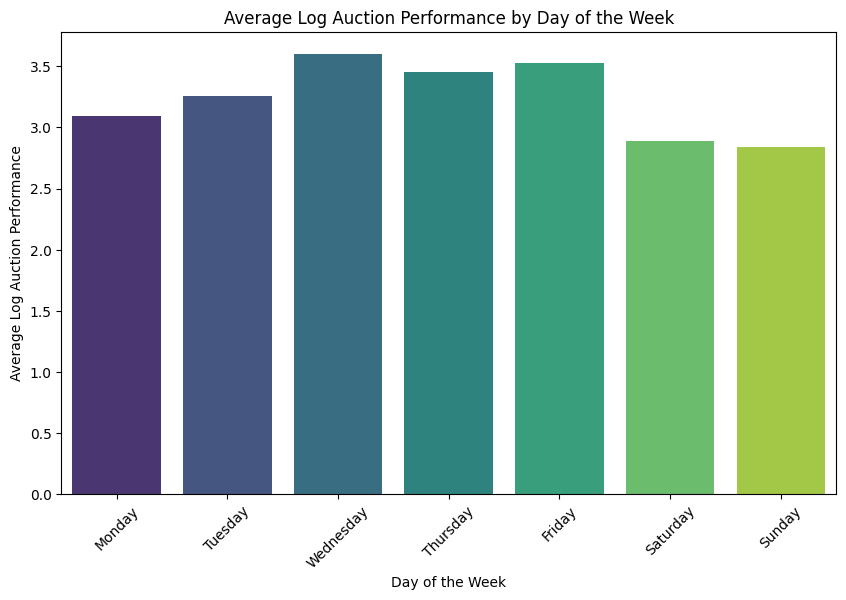

In [176]:
# Group by 'day_of_week' to calculate mean log_auction_performance
performance_by_day = lots.groupby('auction_day_of_week')['log_auction_performance'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plotting the average log_auction_performance by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=performance_by_day.index, y=performance_by_day.values, palette='viridis')
plt.title('Average Log Auction Performance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Log Auction Performance')
plt.xticks(rotation=45)
plt.show()

C:\Users\90538\AppData\Local\Temp\ipykernel_11532\4237681354.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_by_month.index, y=performance_by_month.values, palette='coolwarm')


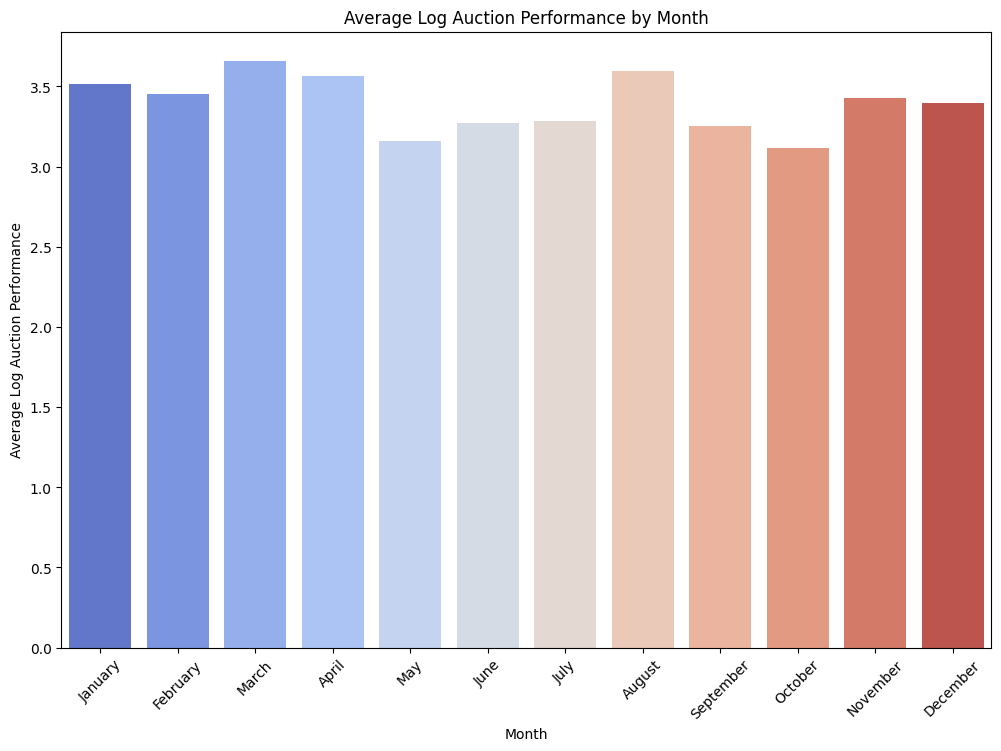

In [177]:
# Group by 'month' to calculate mean log_auction_performance
performance_by_month = lots.groupby('auction_month')['log_auction_performance'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# Plotting the average log_auction_performance by month
plt.figure(figsize=(12, 8))
sns.barplot(x=performance_by_month.index, y=performance_by_month.values, palette='coolwarm')
plt.title('Average Log Auction Performance by Month')
plt.xlabel('Month')
plt.ylabel('Average Log Auction Performance')
plt.xticks(rotation=45)
plt.show()

### Performance by Category Level 1

C:\Users\90538\AppData\Local\Temp\ipykernel_11532\3647785190.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_performance.values, y=sorted_performance.index, palette='dark', orient='h')


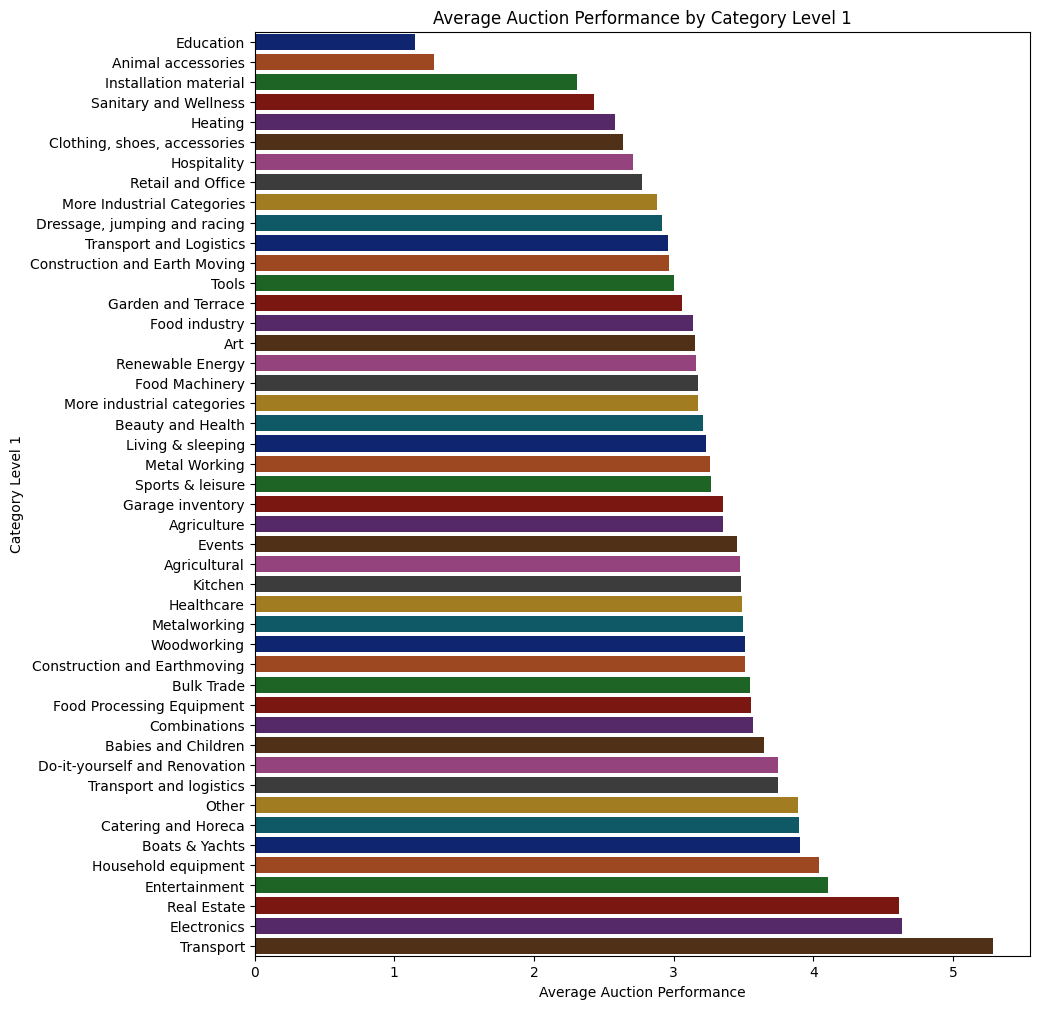

In [182]:
category_details = pd.read_csv("tba_category.csv")
# Create a mapping from category_id to category_level_1
category_map = category_details.set_index('category_id')['category_level_1'].to_dict()

lots['category_level_1'] = lots['category_id'].map(category_map)


# Calculate mean auction performance by category_level_1
performance_by_category = lots.groupby('category_level_1')['log_auction_performance'].mean()


sorted_performance = performance_by_category.sort_values()

plt.figure(figsize=(10, 12))
sns.barplot(x=sorted_performance.values, y=sorted_performance.index, palette='dark', orient='h')
plt.title('Average Auction Performance by Category Level 1')
plt.xlabel('Average Auction Performance')
plt.ylabel('Category Level 1')
plt.show()